c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


iter: 10, likelihood: -2.6330e+02
EM algorithm does not converge within 10 iterations
sigma_beta^2 = 2.5456e+00
sigma_e^2 = 7.7246e-01
beta_post_mean = 3.1002e-01
omega_mean = -1.5984e-02
resident = 6.3828e-02


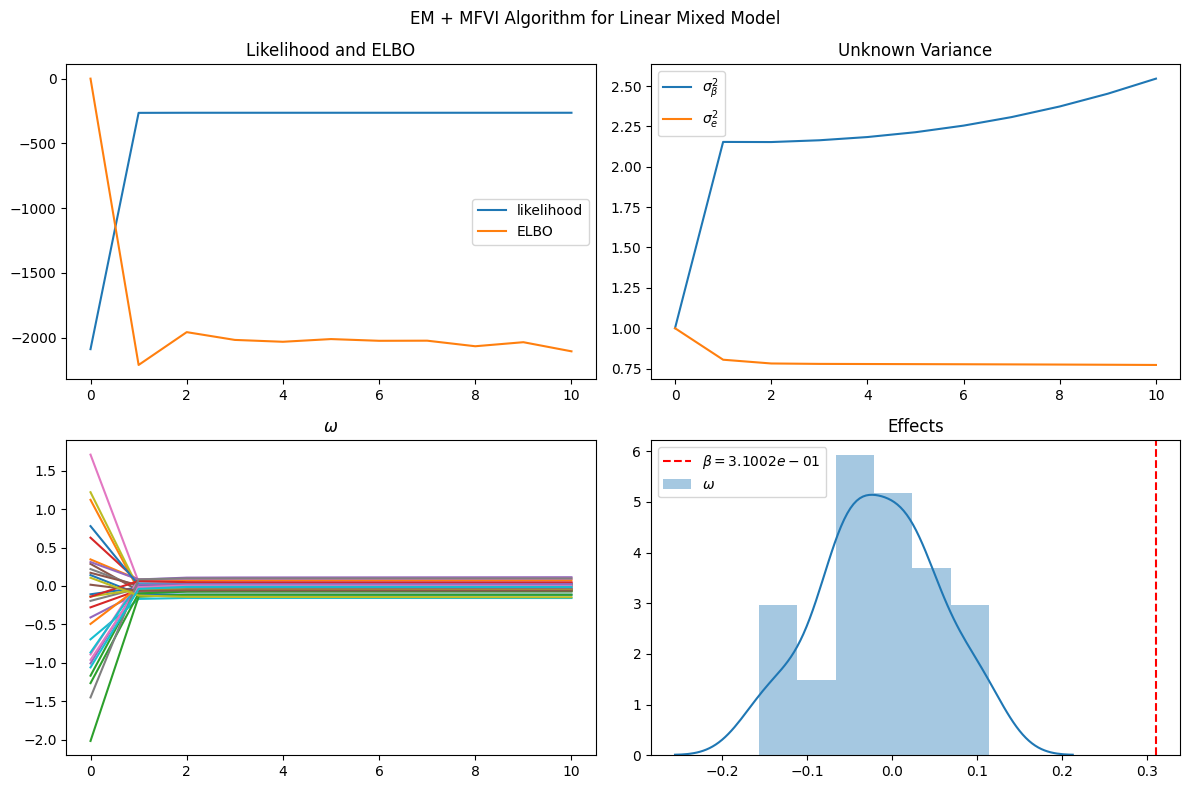

In [1]:
from lmm_mfvi import *
# load data
data_name = 'XYZ_MoM'
data = pd.read_table('data/' + data_name + '.txt', sep='\t',
                        header=0).values
# data = pd.read_table('data/XYZ_MoM.txt', sep='\t', header=0).values
y = data[:, 0].reshape(-1, 1)
Z = data[:, 1:31]
X = data[:, 31:]

# run EM algorithm
# likelihood_list, omega_list, sigma_beta2_list, sigma_e2_list, beta_post_mean = lmm_MFVI(y, X, Z)
MAX_LENGTH = 200
MAX_X_LENGTH = 100
likelihood_list, omega_list, sigma_beta2_list, sigma_e2_list, beta_post_mean, ELBO_list = lmm_MFVI(
    y[:MAX_LENGTH], X[:MAX_LENGTH, :MAX_X_LENGTH], Z[:MAX_LENGTH, :])

# subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(likelihood_list, label='likelihood')
axes[0, 0].plot(ELBO_list, label='ELBO')
axes[0, 0].legend()
axes[0, 0].set_title('Likelihood and ELBO')

axes[0, 1].plot(sigma_beta2_list, label=r'$\sigma_\beta^2$')
axes[0, 1].plot(sigma_e2_list, label=r'$\sigma_e^2$')
axes[0, 1].set_title('Unknown Variance')
axes[0, 1].legend()

axes[1, 0].plot(omega_list.T)
axes[1, 0].set_title(r'$\omega$')

# hist
sns.distplot(omega_list[:, -1], ax=axes[1, 1], label=r'$\omega$')
axes[1, 1].axvline(beta_post_mean,
                    color='r',
                    linestyle='--',
                    label=rf'$\beta={beta_post_mean:.4e}$')
axes[1, 1].set_title('Effects')
axes[1, 1].legend()

plt.suptitle('EM + MFVI Algorithm for Linear Mixed Model')
plt.tight_layout()
plt.savefig('img/lmm_em' + data_name + '.png')
plt.show()